In [10]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [267]:
def x_prime(v,b): #pochodna x
    dxdb= v*np.cos(b)
    return dxdb
    
def y_prime(b,v0=2.8): #pierwsza pochodna y
    dydb= v0*np.sin(b)
    return dydb

def y_prime2(v,b): #pierwsza pochodna y
    dydb= lambda y,t: v*np.sin(b)
    return dydb

In [268]:
def odeEuler2(u0,t,v,b,k1,k2,omega0,tał): #działa!!!!
    """
    approximate the solution of y'=f(y,t) by Euler's method
    
    """
    y_pr=y_prime(v,b)
    k=k1+(k2-k1)/(np.cos(omega0))*(-y_prime(b)/v)
    omega=omega0*(1-np.exp(-t/tał))
    du=lambda u,t: -(1/m)*k*v*(u*np.sin(omega0*(1-np.exp(-t/tał)))+y_pr*np.cos(omega0*(1-np.exp(-t/tał))))

    
    u=np.zeros(len(t))
    u[0]=u0
    for n in range(0,len(t)-1):
        u[n+1] = u[n] + du(u[n],t[n])*(t[n+1] - t[n])
    return u

def odeEuler3(f,y0,t,):
    y=np.zeros(len(t))
    y[0]=y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

In [270]:
y_pir=odeEuler3(y_prime2(v,b),u0,t)
y_pir

array([ 3.06010666e-02, -1.01650548e-01, -2.33902162e-01, ...,
       -1.31956510e+02, -1.32088762e+02, -1.32221013e+02])

In [73]:
def odeEuler2_y(u0,t,v,b,k1,k2,omega0,tał): #euler 1st dla y
    g=9.81
    y_pr=y_prime(b)
    k=k1+(k2-k1)/(np.cos(omega0))*(-y_prime(b)/v)
    du=lambda u,t: (1/m)*k*v*(y_pr*np.sin(omega0*(1-np.exp(-t/tał)))+u*np.cos(omega0*(1-np.exp(-t/tał))))- m*g
    
    u=np.zeros(len(t))
    u[0]=u0
    for n in range(0,len(t)-1):
        u[n+1] = u[n] + du(u[n],t[n])*(t[n+1] - t[n])
    return u

In [74]:
#odeEuler2_y(u0,t,v,b,k1,k2,omega0,tał)

array([  1.        ,  -0.1454    ,  -1.32608923, ..., -38.86077228,
       -38.86086431, -38.86095523])

In [67]:
#odeEuler2(u0,t,v,b,k1,k2,omega0,tał)

In [ ]:
def odeEuler_2nd(z0,u0,t,v,b,k1,k2,omega0,tał):  #2nd for x
    y_pr=y_prime(b)
    k=k1+(k2-k1)/(np.cos(omega0))*(-y_prime(b)/v)
    du=lambda u,t: -(1/m)*k*v*(u*np.cos(omega0*(1-np.exp(-t/tał)))+y_pr*np.sin(omega0*(1-np.exp(-t/tał))))

    
    u=np.zeros(len(t)) #u = x'
    z=np.zeros(len(t)) #z = u'= x"
    u[0]=u0
    z[0]=z0
    for n in range(0,len(t)-1):
        z[n+1]= z[n] + u[n]*(t[n+1] - t[n])
        u[n+1] = u[n] + du(u[n],t[n])*(t[n+1] - t[n])
    return [z,u]

druga pochodna dla x

In [274]:
def odeEuler_2nd_ex(z0,u0,t,v,b,k1,k2,omega0,tał,y_pir):  #2nd for x ====> ekpreyment z zmieniającym się y_pr
    v0=2.8
    #y_pr=y_prime(b)
    #y_pr=lambda t: v0*np.sin(b)
    y_pr=y_pir
    #k=k1+(k2-k1)/(np.cos(omega0))*((-1)*y_pr(b)/v)
    du=lambda u,t,y_pr: -(1/m)*(k1+(k2-k1)/(np.cos(omega0))*((-1)*y_pr/v))*v*(u*np.cos(omega0*(1-np.exp(-t/tał)))+y_pr*np.sin(omega0*(1-np.exp(-t/tał))))
    #dydb= v0*np.sin(b)
    
    u=np.zeros(len(t)) #u = x'
    z=np.zeros(len(t)) #z = u'= x"
    pr=np.zeros(len(t))
    u[0]=u0
    z[0]=z0
    #pr[0]=0
    for n in range(0,len(t)-1):
        #pr[n+1]= pr[n] + y_pr[n]*(t[n+1] - t[n])
        z[n+1]= z[n] + u[n]*(t[n+1] - t[n])
        u[n+1] = u[n] + du(u[n],t[n],y_pr[n])*(t[n+1] - t[n])
    return [z,u]

In [285]:
ex=odeEuler_2nd_ex(z0,u0,t,v,b,k1,k2,omega0,tał,y_pir)

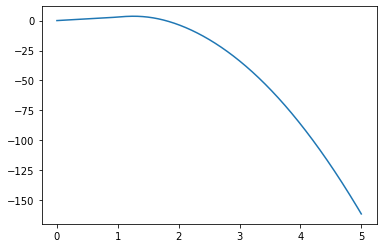

In [286]:
plt.plot(t,ex[0])

In [287]:
def odeEuler_2nd_y(z0,u0,t,v,b,k1,k2,omega0,tał):  #2nd for y
    g=9.81
    y_pr=y_prime(b)
    k=k1+(k2-k1)/(np.cos(omega0))*(-y_prime(b)/v)
    #du=lambda u,t: -(1/m)*k*v*(u*np.cos(omega0*(1-np.exp(-t/tał)))+y_pr*np.sin(omega0*(1-np.exp(-t/tał))))
    du=lambda u,t: -(1/m)*k*v*(y_pr*np.cos(omega0*(1-np.exp(-t/tał)))+u*np.sin(omega0*(1-np.exp(-t/tał))))- m*g

    
    u=np.zeros(len(t)) #u = x'
    z=np.zeros(len(t)) #z = u'= x"
    u[0]=u0
    z[0]=z0
    for n in range(0,len(t)-1):
        z[n+1]= z[n] + u[n]*(t[n+1] - t[n])
        u[n+1] = u[n] + du(u[n],t[n])*(t[n+1] - t[n])
    return [z,u]


def odeEuler_2nd_exy(z0,u0,t,v,b,k1,k2,omega0,tał,y_pir):  #2nd for y experiment
    g=9.81
    y_pr=y_pir
    k=k1+(k2-k1)/(np.cos(omega0))*(-y_prime(b)/v)
    du=lambda u,t,y_pr: -(1/m)*k*v*(y_pr*np.cos(omega0*(1-np.exp(-t/tał)))+u*np.sin(omega0*(1-np.exp(-t/tał))))- m*g

    
    u=np.zeros(len(t)) #u = x'
    z=np.zeros(len(t)) #z = u'= x"
    u[0]=u0
    z[0]=z0
    for n in range(0,len(t)-1):
        z[n+1]= z[n] + u[n]*(t[n+1] - t[n])
        u[n+1] = u[n] + du(u[n],t[n],y_pr[n])*(t[n+1] - t[n])
    return [z,u]

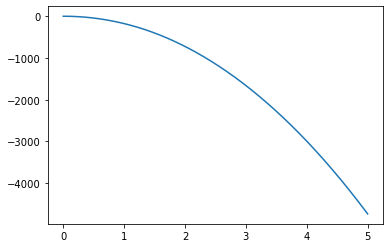

In [288]:
ex_y=odeEuler_2nd_exy(z0,u0,t,v,b,k1,k2,omega0,tał,y_pir)
plt.plot(t,ex_y[0])

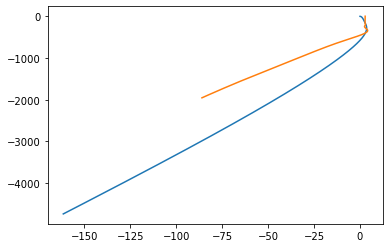

In [289]:
plt.plot(ex[0],ex_y[0])
plt.plot(ex[1],ex_y[1])

In [284]:
z0=0
t = np.linspace(0,5,1001)
u0=2.8
#m=60
m=abs(k*v**2/9.81)
v=26.5 #nie ma za dużo znaczenia, tylko zwiększa się wartości y
b=17.34#0.05 #dla beta 1 psuje się, dopiero dla małych wartośi jak 0.05 jest okk 
#u0=0.5*np.cos(b)
k1=0.001
k2=0.65
omega0=46.5
tał=0.32
sol=odeEuler_2nd(z0,u0,t,v,b,k1,k2,omega0,tał)
sol_y=odeEuler_2nd_y(z0,u0,t,v,b,k1,k2,omega0,tał)
k=k1+(k2-k1)/(np.cos(omega0))*(-y_prime(v,b)/v)
#print(k*v**2/9.81)

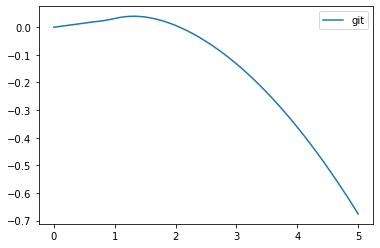

In [245]:
#plt.plot(sol[0],t,label='odwrócone')
plt.plot(t,sol[0], label='git')
plt.legend()
plt.show()

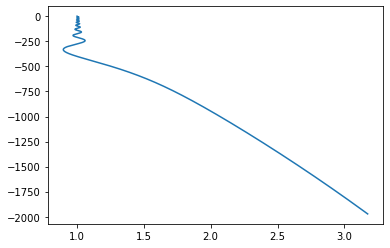

In [229]:
plt.plot(sol[1],sol_y[1])
plt.show()

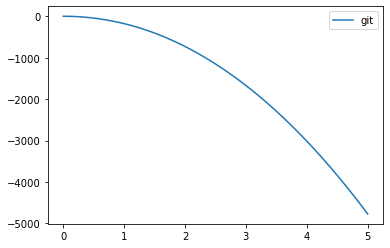

In [242]:
plt.plot(t,sol_y[0], label='git')
plt.legend()
plt.show()

złożenie, zobaczmy co z tego wyjdzie xdd

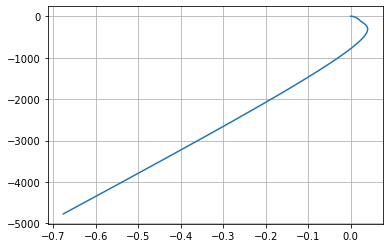

In [243]:
plt.plot(sol[0],sol_y[0])
#plt.ylim(-80,4)
plt.grid()
plt.show()

czas na równania z wiatrem

In [ ]:
def odeEuler_wind(z0,u0,t,v,b,k1,k2,omega0,tał): 
    g=9.81
    y_pr=y_prime(v,b)
    k=k1+(k2-k1)/(np.cos(omega0))*(-y_prime(v,b)/v)
    du=lambda u,t: (1/m)*k*v*(y_pr*np.sin(omega0*(1-np.exp(-t/tał)))+u*np.cos(omega0*(1-np.exp(-t/tał))))- m*g

    
    u=np.zeros(len(t)) #u = x'
    z=np.zeros(len(t)) #z = u'= x"
    u[0]=u0
    z[0]=z0
    for n in range(0,len(t)-1):
        z[n+1]= z[n] + u[n]*(t[n+1] - t[n])
        u[n+1] = u[n] + du(u[n],t[n])*(t[n+1] - t[n])
    return [z,u]